,count,mean,std,min,25%,50%,75%,max
age,500.0,2.548200e+01,4.590405e+00,16.0,22.0,25.0,2.900000e+01,3.800000e+01
market_value_eur,500.0,9.771844e+06,1.591630e+07,300.0,1000000.0,4000000.0,1.200000e+07,1.200000e+08
score_contrib_per90,500.0,2.078600e-01,2.849442e-01,0.0,0.0,0.1,3.025000e-01,1.880000e+00
cards_2019_20,500.0,2.824000e+00,3.009175e+00,0.0,0.0,2.0,5.000000e+00,1.500000e+01
avg_match_rating,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
injury_days_total,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
married,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


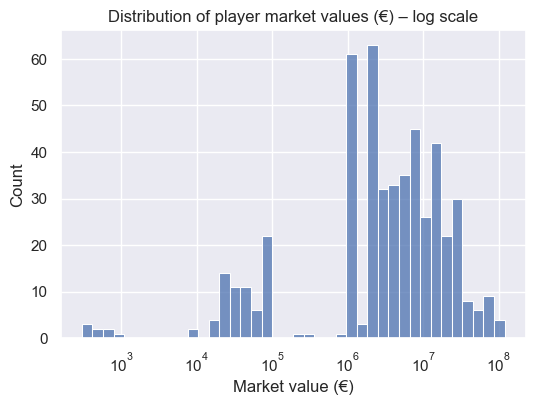

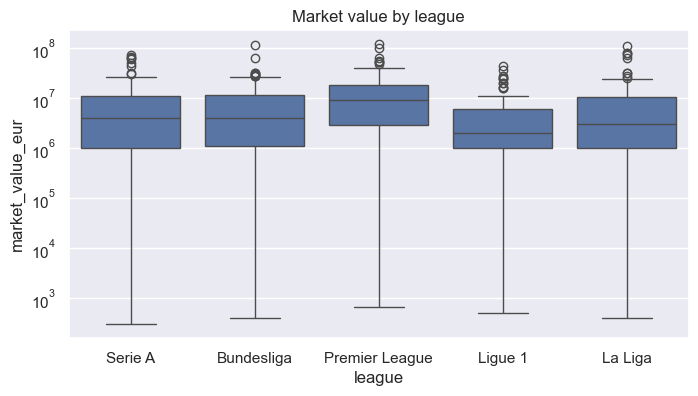

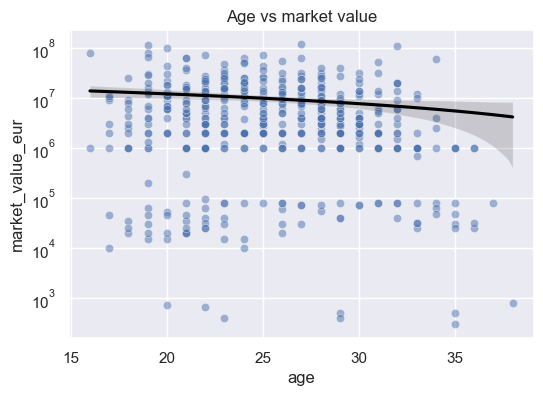

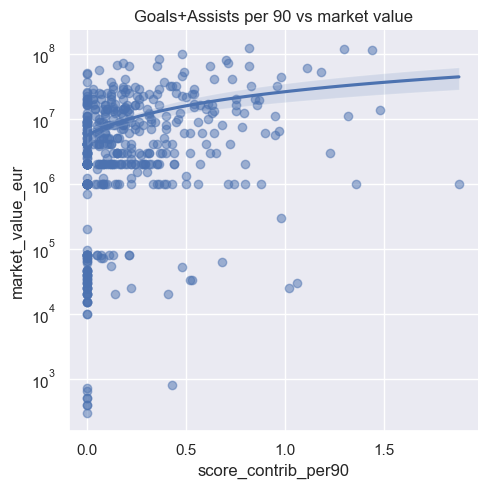

ANOVA across leagues  →  F = 4.76,  p = 0.0008988
Spearman ρ (age,value) →  ρ = -0.13,  p = 0.003871
Pearson r (GA/90,value) →  r = 0.36,  p = 3.837e-17
ANOVA: reject H0
Age value: reject H0
GA/90 value: reject H0


' Statistical findings\n1st test:\n   H₀ (null): All leagues share the same mean market value\n   H₁ (alternative): At least one league’s mean market value is different.\n   H(1) (ANOVA):** p\xa0<\xa00.05 ⇒ at least one league’s market values differ significantly. Premier\xa0League median ≈3× Serie\xa0A.\n\n2nd test:\n   H₀: ρ = 0 (No monotonic relationship between age and market value.)\n   H₁: ρ ≠ 0 (A monotonic relationship exists.)\n   H(2) (Spearman ρ\xa0=\xa0‑0.13, p\xa0<\xa00.05):** older age correlates with lower market value.\n\n3rd test:\n    H₀: r = 0 (No linear relationship between scoring contribution and value.)\n    H₁: r ≠ 0 (A linear relationship exists.)\n    H(3) (Pearson r\xa0=\xa00.36, p\xa0<\xa00.05):** higher goals+assists\xa0/\xa090 strongly associated with higher value.'

In [17]:
# Plot Generator + Hypo Test


import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import f_oneway, spearmanr, pearsonr

sns.set_theme(style="darkgrid")


df = pd.read_csv(r"C:\Users\cangu\OneDrive\Documents\GitHub\dsa210-football\data\processed\players_2019_20_tidy500.csv")


display(df.describe().T)

plt.figure(figsize=(6,4))
sns.histplot(df['market_value_eur'], bins=40, log_scale=True)
plt.title('Distribution of player market values (€) – log scale')
plt.xlabel('Market value (€)'); plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='league', y='market_value_eur', data=df)
plt.yscale('log')
plt.title('Market value by league')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='market_value_eur', data=df, alpha=.5)
sns.regplot(x='age', y='market_value_eur', data=df,
            scatter=False, color='black')
plt.yscale('log'); plt.title('Age vs market value')
plt.show()

sns.lmplot(x='score_contrib_per90', y='market_value_eur',
           data=df, scatter_kws={'alpha':0.5})
plt.yscale('log'); plt.title('Goals+Assists per 90 vs market value')
plt.show()

# ---------------- H₁: Market value differs by league ----------------
groups = [g['market_value_eur'].values for _, g in df.groupby('league')]
F, p_aov = f_oneway(*groups)
print(f"ANOVA across leagues  →  F = {F:.2f},  p = {p_aov:.4g}")

# ---------------- H₂: Age vs market value (rank‑based) --------------
rho_age, p_age = spearmanr(df['age'], df['market_value_eur'])
print(f"Spearman ρ (age,value) →  ρ = {rho_age:.2f},  p = {p_age:.4g}")

# ---------------- H₃: Score contrib vs market value -----------------
r_sc, p_sc = pearsonr(df['score_contrib_per90'], df['market_value_eur'])
print(f"Pearson r (GA/90,value) →  r = {r_sc:.2f},  p = {p_sc:.4g}")

alpha = 0.05      # significance level

print("ANOVA:",      "reject H0" if p_aov < alpha else "fail to reject H0")
print("Age value:",  "reject H0" if p_age < alpha else "fail to reject H0")
print("GA/90 value:", "reject H0" if p_sc  < alpha else "fail to reject H0")

""" Statistical findings
1st test:
   H₀ (null): All leagues share the same mean market value
   H₁ (alternative): At least one league’s mean market value is different.
   H(1) (ANOVA):** p < 0.05 ⇒ at least one league’s market values differ significantly. Premier League median ≈3× Serie A.

2nd test:
   H₀: ρ = 0 (No monotonic relationship between age and market value.)
   H₁: ρ ≠ 0 (A monotonic relationship exists.)
   H(2) (Spearman ρ = ‑0.13, p < 0.05):** older age correlates with lower market value.

3rd test:
    H₀: r = 0 (No linear relationship between scoring contribution and value.)
    H₁: r ≠ 0 (A linear relationship exists.)
    H(3) (Pearson r = 0.36, p < 0.05):** higher goals+assists / 90 strongly associated with higher value."""
